In [3]:
#!/usr/bin/env python3
import qiskit
from qiskit import (
    QuantumCircuit,
    QuantumRegister,
    ClassicalRegister,
    transpile
)
from qiskit.quantum_info import (
    Kraus, 
    SuperOp,
)
from qiskit_aer.noise import(
    depolarizing_error,
    phase_damping_error,
    NoiseModel,
    QuantumError,
    amplitude_damping_error,
)
# from qiskit_ibm_provider import IBMProvider
from qiskit import Aer
from qiskit_aer import AerSimulator
import matplotlib.pyplot as plt
from copy import deepcopy
import numpy as np
import math
import sys
sys.path.append('../')
import utilities as utl
import importlib
import json
importlib.reload(utl)
# BASIS=["h", "x", "rz", "ccx", "cx", "cz", "id"]

SHOTS=40000

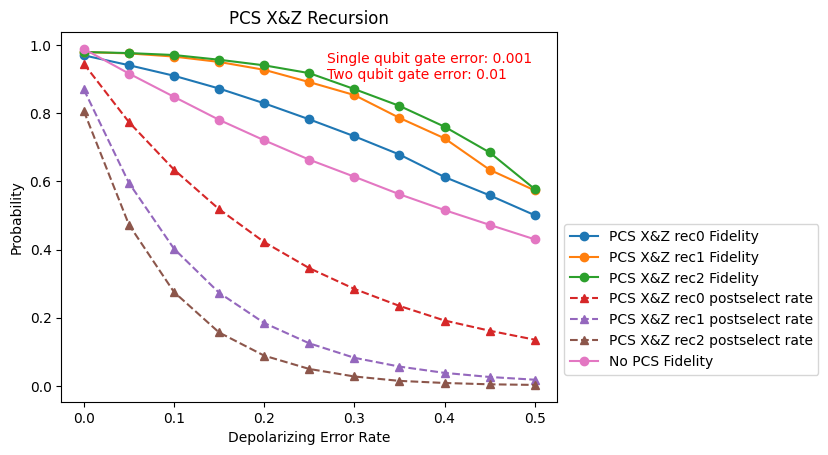

[0.9888499999999999, 0.9166, 0.8482000000000001, 0.7807, 0.72065, 0.66375, 0.61365, 0.56225, 0.5157499999999999, 0.47245000000000004, 0.42995]
[0.9699935173327063, 0.9410870017625491, 0.9100876796932484, 0.8726160369149866, 0.8292116559520506, 0.7821560803953682, 0.7324542305024879, 0.678815182290561, 0.6128748221747022, 0.5590914861528803, 0.5008063198412593]
[0.9796288151137905, 0.9756856165075337, 0.9664327972855202, 0.9506572579610129, 0.9275389098642904, 0.8914747576920711, 0.8534342175698729, 0.7863823379011156, 0.7263805289296001, 0.6341247406784798, 0.5735878288218488]
[0.979793963684672, 0.9766713536731391, 0.9709328136251701, 0.9571176539511423, 0.9406856709194088, 0.917745237362447, 0.8709485920655905, 0.8216013540733123, 0.7605130658902216, 0.6849915960916401, 0.577408377860531]
[0.94526, 0.77417, 0.6345, 0.51837, 0.42187, 0.34538, 0.28442, 0.23447, 0.19167, 0.16169, 0.13538]
[0.86999, 0.59565, 0.40226, 0.27311, 0.1844, 0.12473, 0.08222, 0.05643, 0.03793, 0.02591, 0.01788]


In [4]:
errors=np.linspace(0.0, stop=0.5, num=11, endpoint=True)
error_gate1=0.001
with open(f"json\\pcsXZ_rec2_xonlylater_unbiased_noswap.json") as fxz_rec2:
        data_xz_rec2=json.load(fxz_rec2)
with open(f"json\\pcsXZ_rec1_xonlylater_unbiased_noswap.json") as fxz_rec1:
        data_xz_rec1=json.load(fxz_rec1)
with open(f"json\\pcsXZ_rec0_unbiased_noswap.json") as fxz_rec0:
        data_xz_rec0=json.load(fxz_rec0)
with open("json\\raw_unbiased_noswap.json") as fRaw:
        dataRaw=json.load(fRaw)
rec0_fidelitites=data_xz_rec0["fidelities"]
rec0_postselect=data_xz_rec0["postselectRates"]
rec1_fidelitites=data_xz_rec1["fidelities"]
rec1_postselect=data_xz_rec1["postselectRates"]
rec2_fidelitites=data_xz_rec2["fidelities"]
rec2_postselect=data_xz_rec2["postselectRates"]
nopcs_all_fidelities=dataRaw["fidelities"]
plt.plot(errors, rec0_fidelitites, label="PCS X&Z rec0 Fidelity", marker='o')
plt.plot(errors, rec1_fidelitites, label="PCS X&Z rec1 Fidelity", marker='o')
plt.plot(errors, rec2_fidelitites, label="PCS X&Z rec2 Fidelity", marker='o')
plt.plot(errors, rec0_postselect, label="PCS X&Z rec0 postselect rate",  marker='^', linestyle="--")
plt.plot(errors, rec1_postselect, label="PCS X&Z rec1 postselect rate",  marker='^', linestyle="--")
plt.plot(errors, rec2_postselect, label="PCS X&Z rec2 postselect rate",  marker='^', linestyle="--")
plt.plot(errors, nopcs_all_fidelities, label="No PCS Fidelity", marker='o')


plt.ylabel('Probability')
plt.xlabel(f"Depolarizing Error Rate")
plt.text(0.27, .9, f"Single qubit gate error: {error_gate1}\nTwo qubit gate error: {round(error_gate1*10, 4)}", color = "red")
plt.title(f"PCS X&Z Recursion")
plt.legend(bbox_to_anchor=(1,0.5))
plt.savefig(f"images\\pcsXZ_reps_comibned_unbiased_noswap.png", bbox_inches='tight')
plt.show()
print(nopcs_all_fidelities)
print(rec0_fidelitites)
print(rec1_fidelitites)
print(rec2_fidelitites)
print(rec0_postselect)
print(rec1_postselect)
print(rec2_postselect)
print(errors)

In [5]:
qiskit.__qiskit_version__

'0.46.0'